# Decision Trees (DTs)

In [1]:
# Common imports
import numpy as np
import pandas as pd

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# The number of features when fit is performed
tree_clf.n_features_

2

In [5]:
tree_clf.max_features_

2

In [6]:
tree_clf.n_outputs_

1

In [7]:
# The classes labels
tree_clf.classes_

array([0, 1, 2])

In [8]:
# The number of classes
tree_clf.n_classes_

3

In [9]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [10]:
# The feature importances. The higher, the more important the feature. 
tree_clf.feature_importances_

array([0.56199095, 0.43800905])

**Visualize the trained DT**

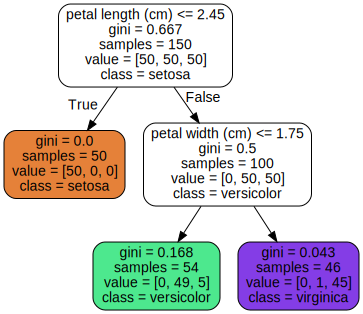

In [11]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True, filled=True)
graphviz.Source(dot_data)

**DT decision boundary**

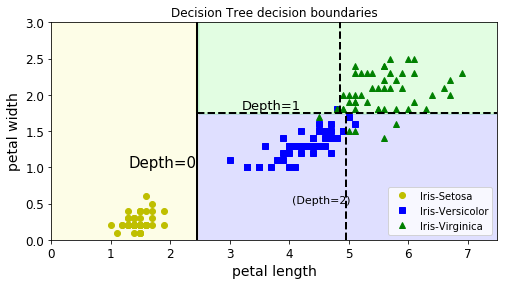

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contourf(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1],
                 "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2],
                 "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length", fontsize=14)
        plt.ylabel("petal width", fontsize=14)
    else:
        plt.xlabel("$x_1$", fontsize=18)
        plt.ylabel("$x_2$", fontsize=18)
    if legend:
        plt.legend(loc="lower right", fontsize=10)


plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k--", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k--", linewidth=2)
plt.text(1.3, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.title("Decision Tree decision boundaries")
plt.show()

### Estimating Class Probabilities

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.predict([[5, 1.5]])

array([1])

### Regularization Hyperparameters

In [15]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

In [16]:
print("Shape of Xm:\t", Xm.shape)
Xm[:5]

Shape of Xm:	 (100, 2)


array([[ 0.20706864,  0.98150398],
       [ 1.16289446,  0.01844799],
       [ 0.1426683 , -0.1109168 ],
       [ 1.1326334 ,  0.26763099],
       [ 0.52544099, -0.32757822]])

In [17]:
ym

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [19]:
deep_tree_clf1.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [20]:
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

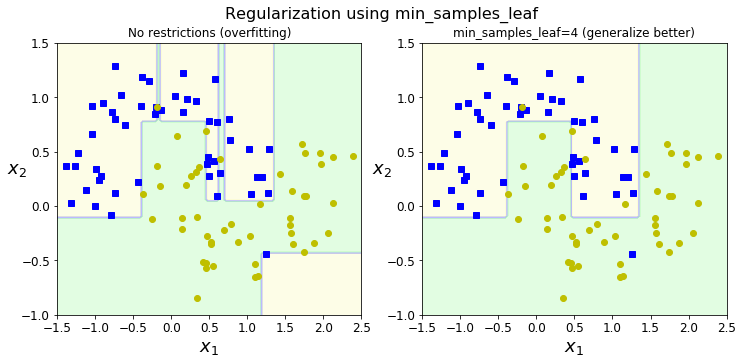

In [21]:
# plot the result
x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.ravel(), x2.ravel()]
y_pred1 = deep_tree_clf1.predict(X).reshape(x1.shape)
y_pred2 = deep_tree_clf2.predict(X).reshape(x1.shape)

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "bs")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "yo")
plt.contourf(x1, x2, y_pred1, alpha=.3, cmap=custom_cmap)
plt.title("No restrictions (overfitting)", fontsize=12)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.axis([-1.5, 2.5, -1, 1.5])


plt.subplot(122)
plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "bs")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "yo")
plt.contourf(x1, x2, y_pred2, alpha=.3, cmap=custom_cmap)
plt.title("min_samples_leaf=4 (generalize better)", fontsize=12)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.axis([-1.5, 2.5, -1, 1.5])

plt.suptitle("Regularization using min_samples_leaf", fontsize=16)
plt.show()

### Regression

**Generate a noisy quadratic dataset**

In [22]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
print("Shape of X:\t", X.shape)
X[:5]

Shape of X:	 (200, 1)


array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864]])

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

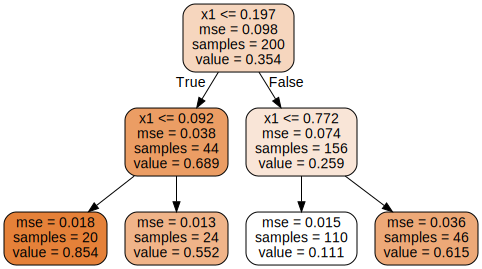

In [25]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_reg,
                                 out_file=None,
                                 feature_names=["x1"],
                                 rounded=True,
                                 filled=True)
graphviz.Source(dot_data)

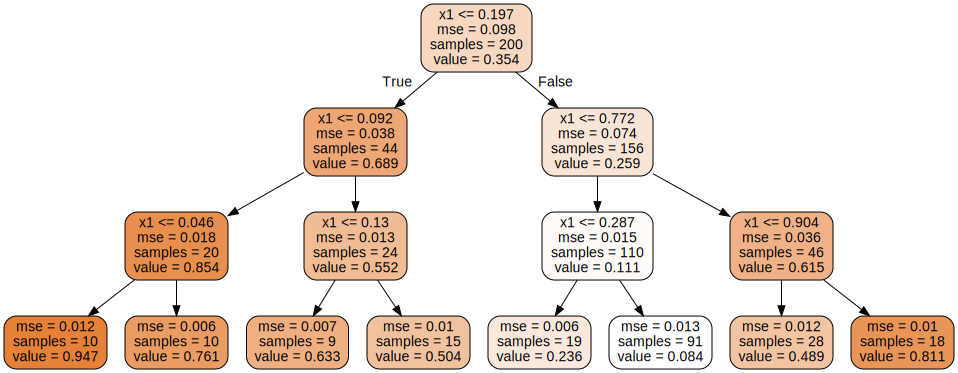

In [26]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

dot_data = export_graphviz(tree_reg,
                           out_file=None,
                           feature_names=["x1"],
                           rounded=True,
                           filled=True)
graphviz.Source(dot_data)

In [27]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

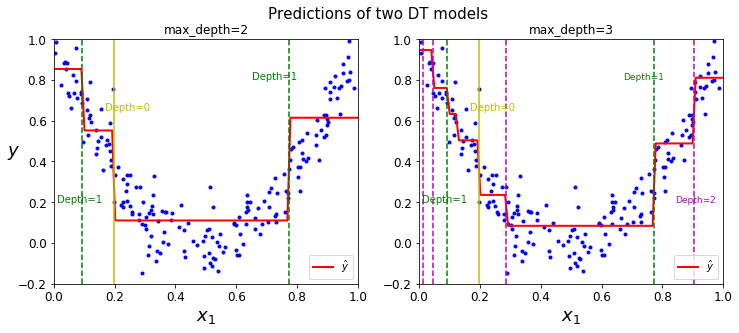

In [28]:
x1 = np.linspace(0, 1, 100).reshape(-1, 1)  # shape (100,) -> (100, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)
plt.figure(figsize=(12, 4.5))

plt.subplot(121)

plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r-", linewidth=2, label="$\hat{y}$")
plt.plot([0.197, 0.197], [-0.2, 1.0], "y-")
plt.text(0.167, 0.65, "Depth=0", fontsize=10, fontdict={"color": "y"})
plt.plot([0.092, 0.092], [-0.2, 1.0], "g--")
plt.text(0.01, 0.2, "Depth=1", fontsize=10, fontdict={"color": "g"})
plt.plot([0.772, 0.772], [-0.2, 1.0], "g--")
plt.text(0.65, 0.8, "Depth=1", fontsize=10, fontdict={"color": "g"})
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0, 1, -0.2, 1])
plt.legend(loc="best")
plt.title("max_depth=2", fontsize=12)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r-", linewidth=2, label="$\hat{y}$")
plt.plot([0.197, 0.197], [-0.2, 1.0], "y-")
plt.text(0.167, 0.65, "Depth=0", fontsize=10, fontdict={"color": "y"})
plt.plot([0.092, 0.092], [-0.2, 1.0], "g--")
plt.text(0.01, 0.2, "Depth=1", fontsize=10, fontdict={"color": "g"})
plt.plot([0.772, 0.772], [-0.2, 1.0], "g--")
plt.text(0.67, 0.8, "Depth=1", fontsize=9, fontdict={"color": "g"})
plt.plot([0.046, 0.046], [-0.2, 1.0], "m--")
plt.plot([0.013, 0.013], [-0.2, 1.0], "m--")
plt.plot([0.287, 0.287], [-0.2, 1.0], "m--")
plt.plot([0.904, 0.904], [-0.2, 1.0], "m--")
plt.text(0.84, 0.2, "Depth=2", fontsize=9, fontdict={"color": "m"})
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 1, -0.2, 1])
plt.legend(loc="best")
plt.title("max_depth=3", fontsize=12)

plt.suptitle("Predictions of two DT models", fontsize=15)
plt.show()

In [29]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

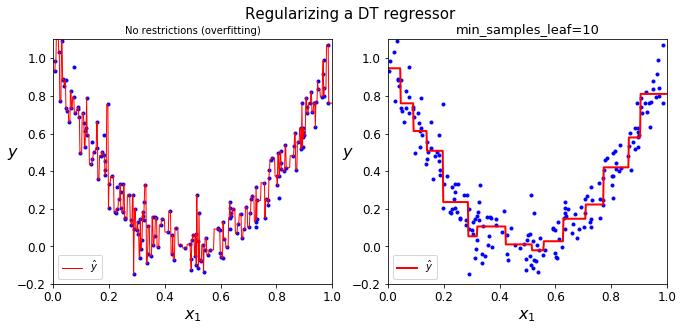

In [30]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)  # shape (500, ) -> (500, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4.5))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r-", linewidth=1, label="$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.legend(loc="best")
plt.title("No restrictions (overfitting)", fontsize=10)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r-", linewidth=2, label="$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.legend(loc="best")
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=13)

plt.suptitle("Regularizing a DT regressor", fontsize=15)
plt.show()

### Instability

DTs have a few limitations. 

+ **DTs love orthogonal (正交的) decision boundaries (all splits are perpendicular (垂直的，正交的) to an axis), which makes them sensitive to training set rotation.**

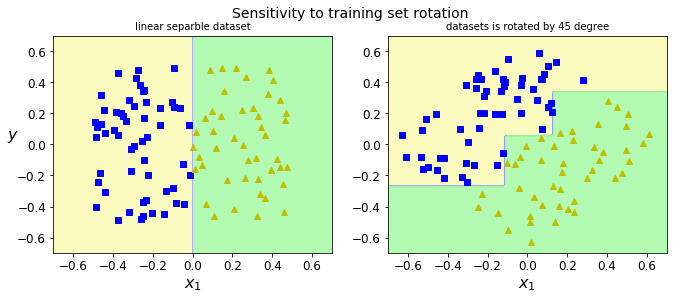

In [31]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2  # values: 0 or 2

angle = np.pi / 4
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

x1s = np.linspace(-0.7, 0.7, 100)
x2s = np.linspace(-0.7, 0.7, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.ravel(), x2.ravel()]
y_pred_s = tree_clf_s.predict(X).reshape(x1.shape)
y_pred_sr = tree_clf_sr.predict(X).reshape(x1.shape)

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "bs")
plt.plot(Xs[:, 0][ys == 2], Xs[:, 1][ys == 2], "y^")
plt.contourf(x1, x2, y_pred_s, alpha=.8, cmap=custom_cmap)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.title("linear separble dataset", fontsize=10)

plt.subplot(122)
plt.plot(Xsr[:, 0][ys == 0], Xsr[:, 1][ys == 0], "bs")
plt.plot(Xsr[:, 0][ys == 2], Xsr[:, 1][ys == 2], "y^")
plt.contourf(x1, x2, y_pred_sr, alpha=.8, cmap=custom_cmap)
plt.xlabel("$x_1$", fontsize=16)
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.title("datasets is rotated by 45 degree", fontsize=10)

plt.suptitle("Sensitivity to training set rotation", fontsize=14)
plt.show()

One way to limit this problem is to use PCA, which often results in a better orientation of the training data.

+ **DTs are very sensitive to small variations in the training data.**

Remove the widest Iris-Veriscolor from the irsi training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new dt.

In [32]:
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]  # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [33]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

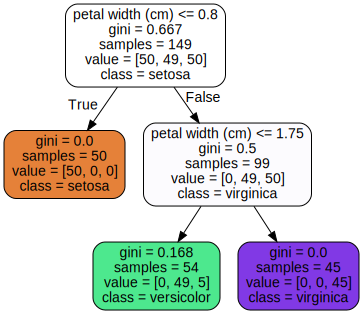

In [34]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf_tweaked, out_file=None,
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True, filled=True)
graphviz.Source(dot_data)

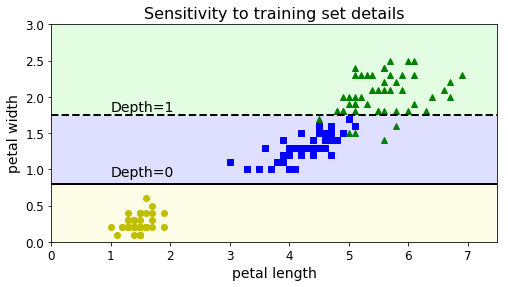

In [36]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=14)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 1.8, "Depth=1", fontsize=14)

plt.title("Sensitivity to training set details", fontsize=16)
plt.show()

Random Forest can limit this instability by averaging predictions over many trees.